<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_12_RNN_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%AC%B8%EC%84%9C_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10. RNN - 딥러닝을 이용한 문서 분류

## 10.3. RNN을 이용한 문서 분류 - NLTK 영화 리뷰 감성분석

### 10.3.1 워드 임베딩을 위한 데이터 준비


In [ ]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids() #movie review data에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file id를 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]
#file id를 이용해 label로 사용할 category 즉 positive와 negative 정보를 순서대로 가져옴

print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Labels:', set(categories))

Reviews count: 2000
Length of the first review: 4043
Labels: {'pos', 'neg'}


In [ ]:
reviews[0]  # 2,000개 기사(text)

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(7)
tf.random.set_seed(7)

max_words = 10000 #사용할 단어의 수

# 빈도가 높은 10000개의 단어를 선택하도록 객체 생성
# oov_token은 Out-Of-Vocabulary (OOV), 즉 사전에 없는 단어들을 처리하기 위한 옵션으로,
# 'UNK'는 Unknown의 약자로, Tokenizer가 사전에 없는 단어를 만났을 때 해당 단어를 'UNK'로 대체
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK')

tokenizer.fit_on_texts(reviews) #단어 인덱스 구축

#만들어진 단어 인덱스를 이용해 문서들을 변환
X = tokenizer.texts_to_sequences(reviews)

Lengths of first 10 documents: [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [ ]:
type(X), len(X)

(list, 2000)

In [ ]:
X[0]

[98,
 77,
 949,
 4622,
 131,
 6,
 3,
 2016,
 789,
 3764,
 4,
 103,
 1314,
 37,
 73,
 56,
 25,
 1341,
 24,
 5,
 2,
 519,
 1325,
 17,
 14,
 678,
 1571,
 6,
 84,
 55,
 8,
 34,
 90,
 4,
 33,
 4477,
 604,
 2,
 638,
 242,
 2,
 27,
 4,
 8854,
 190,
 41,
 2186,
 3,
 302,
 6462,
 27,
 13,
 2,
 949,
 1458,
 9,
 2402,
 20,
 3,
 80,
 691,
 362,
 17,
 1768,
 10,
 8,
 3,
 80,
 106,
 3980,
 46,
 7,
 49,
 143,
 15,
 466,
 25,
 57,
 3668,
 24,
 6,
 1175,
 195,
 19,
 1342,
 8855,
 96,
 46,
 527,
 6,
 831,
 2,
 7098,
 903,
 12,
 170,
 363,
 4,
 118,
 342,
 4204,
 8856,
 17,
 53,
 21,
 62,
 4,
 106,
 753,
 5,
 243,
 36,
 2695,
 5,
 96,
 4,
 113,
 1879,
 51,
 249,
 1,
 15,
 24,
 6180,
 37,
 250,
 6,
 32,
 625,
 15,
 272,
 3765,
 1224,
 17,
 2795,
 10,
 2284,
 40,
 49,
 21,
 2,
 470,
 12,
 2,
 27,
 78,
 65,
 349,
 354,
 7,
 9,
 38,
 322,
 89,
 7840,
 10,
 437,
 88,
 1315,
 17,
 103,
 1,
 56,
 15,
 1446,
 146,
 8,
 46,
 35,
 11,
 25,
 162,
 1123,
 32,
 60,
 362,
 604,
 160,
 20,
 53,
 21,
 1077,
 53,
 21,
 8

In [ ]:
# join으로 일렬로 확인
'/ '.join(str(x) for x in X[0])

'98/ 77/ 949/ 4622/ 131/ 6/ 3/ 2016/ 789/ 3764/ 4/ 103/ 1314/ 37/ 73/ 56/ 25/ 1341/ 24/ 5/ 2/ 519/ 1325/ 17/ 14/ 678/ 1571/ 6/ 84/ 55/ 8/ 34/ 90/ 4/ 33/ 4477/ 604/ 2/ 638/ 242/ 2/ 27/ 4/ 8854/ 190/ 41/ 2186/ 3/ 302/ 6462/ 27/ 13/ 2/ 949/ 1458/ 9/ 2402/ 20/ 3/ 80/ 691/ 362/ 17/ 1768/ 10/ 8/ 3/ 80/ 106/ 3980/ 46/ 7/ 49/ 143/ 15/ 466/ 25/ 57/ 3668/ 24/ 6/ 1175/ 195/ 19/ 1342/ 8855/ 96/ 46/ 527/ 6/ 831/ 2/ 7098/ 903/ 12/ 170/ 363/ 4/ 118/ 342/ 4204/ 8856/ 17/ 53/ 21/ 62/ 4/ 106/ 753/ 5/ 243/ 36/ 2695/ 5/ 96/ 4/ 113/ 1879/ 51/ 249/ 1/ 15/ 24/ 6180/ 37/ 250/ 6/ 32/ 625/ 15/ 272/ 3765/ 1224/ 17/ 2795/ 10/ 2284/ 40/ 49/ 21/ 2/ 470/ 12/ 2/ 27/ 78/ 65/ 349/ 354/ 7/ 9/ 38/ 322/ 89/ 7840/ 10/ 437/ 88/ 1315/ 17/ 103/ 1/ 56/ 15/ 1446/ 146/ 8/ 46/ 35/ 11/ 25/ 162/ 1123/ 32/ 60/ 362/ 604/ 160/ 20/ 53/ 21/ 1077/ 53/ 21/ 82/ 505/ 136/ 29/ 2/ 329/ 53/ 21/ 486/ 28/ 178/ 39/ 2/ 329/ 53/ 21/ 770/ 1/ 53/ 21/ 1/ 53/ 21/ 3/ 1/ 5/ 911/ 115/ 53/ 21/ 5278/ 5/ 1387/ 172/ 9/ 633/ 4/ 64/ 5/ 10/ 7/ 322/ 26/ 1958/ 144

In [ ]:
##  첫 문장을 위와 같이 token화
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [ ]:
len(X[0])

710

### **[what-are-tokens-and-how-to-count-them](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them)**

In [ ]:
print('Lengths of first 10 documents:', [len(doc) for doc in X[:10]])

Lengths of first 10 documents: [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [ ]:
print("Index of 'the':", tokenizer.word_index["the"])
print("Index of 'review':", tokenizer.word_index["review"])
print("Index of out-of-vocabulary words:", tokenizer.word_index["UNK"])

Index of 'the': 2
Index of 'review': 466
Index of out-of-vocabulary words: 1


### 규격화

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 500 #문서의 단어 수를 제한

# 문서의 단어 수가 500보다 작으면 0을 채우고, 크면 잘라냄
# 잘라낼 때, 앞을 자를 지, 뒤를 자를 지 선택할 수 있음. 앞을 자르고 뒷부분을 쓰고자 하면 'pre' 선택
X = pad_sequences(X, maxlen=maxlen, truncating='pre')

In [ ]:
print('Lengths of first 10 documents:', [len(doc) for doc in X[:10]])

Lengths of first 10 documents: [500, 500, 500, 500, 500, 500, 500, 500, 500, 500]


In [ ]:
import numpy as np

# label을 0, 1의 값으로 변환
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


### 10.3.2 RNN이 아닌 일반적인 신경망 모형을 이용한 분류


In [ ]:
# 케라스 모형 생성 및 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential([ #순차적 모형
    Embedding(max_words, 32, input_length=maxlen), #word embedding layer 생성
    # max_words는 one-hot encoding을 할 때의 vector 크기가 됨 - 사용된 단어의 수만큼
    # 각 단어는 32 크기의 dense vector로 embedding 됨
    # input_length는 한 document의 단어 수로 표현
    # 이 과정을 거치면 각 document는 (maxlen, 32)의 2차원 행렬이 됨 - 즉 word의 sequence가 됨

    Flatten(), # 2차원 행렬을 1차원으로 펼침
    Dense(1, activation='sigmoid') #binary logistic regression을 수행
])

model.summary() #모델의 요약정보 출력

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모형의 optimizer와 loss function 등을 지정
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# 학습을 수행
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.4904 - loss: 0.6948 - val_acc: 0.5375 - val_loss: 0.6893
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9047 - loss: 0.6148 - val_acc: 0.5469 - val_loss: 0.6820
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9631 - loss: 0.5191 - val_acc: 0.6031 - val_loss: 0.6677
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9835 - loss: 0.3877 - val_acc: 0.6313 - val_loss: 0.6476
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9945 - loss: 0.2540 - val_acc: 0.6406 - val_loss: 0.6294
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9949 - loss: 0.1505 - val_acc: 0.6438 - val_loss: 0.6188
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9952 - loss: 0.0836 - val_acc: 0.6562 - val_loss: 0.6178
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 1.0000 - loss: 0.0450 - val_acc: 0.6562 - val_loss: 0.6264
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 1.0000 - los

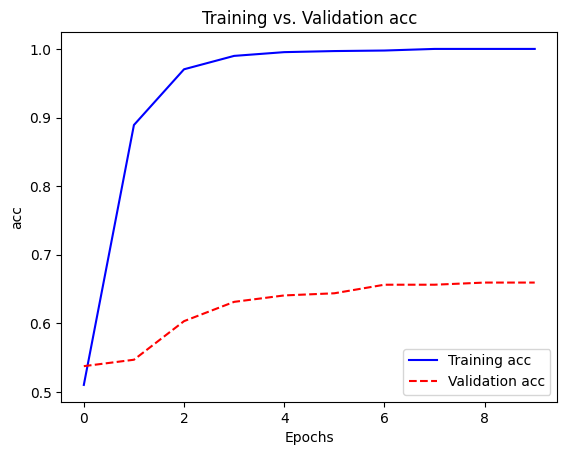

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'acc')

In [ ]:
#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6357 - loss: 0.6652  
#Test accuracy:0.635


### 10.3.3 문서의 순서정보를 활용하는 RNN 기반 문서분류


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

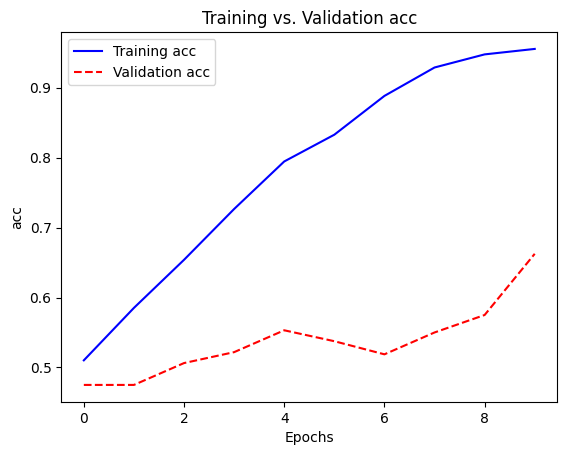

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.6578 - loss: 0.6361
#Test accuracy:0.655


In [ ]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(max_words, 32),
    SimpleRNN(32), # 펼쳐서 flat하게 만드는 대신 RNN 모형을 사용, maxlen만큼의 시계열 데이터
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=0,
                    validation_split=0.2)

plot_results(history, 'acc')
#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

## 10.4. LSTM, Bi-LSTM과 GRU를 이용한 성능 개선


In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential([
    Embedding(max_words, 64),
    Bidirectional(LSTM(64)), # simple RNN 대신 bidirectional LSTM을 사용
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=8,
                    verbose=0,
                    validation_split=0.2)

plot_results(history, 'acc')

#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

ValueError: Unknown variable: <KerasVariable shape=(10000, 64), dtype=float32, path=sequential_5/embedding_5/embeddings>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [ ]:
y_pred = np.round(model.predict(X_test[:10]))
for pred, y_t in zip(y_pred, y_test[:10]):
    print(f'predicted value: {pred[0]}, true value: {y_t}, so the prediction is {pred[0] == y_t}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 1, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
